In [1]:
from ns_vfs.common.utility import load_pickle_to_dict
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import seaborn as sns
import pandas as pd


In [2]:
# Mapping Function
def sigmoid(x, a=1, k=7.02, x0=0):
  return a / (1 + np.exp(-k * (x-x0) ))

def get_accuracy_range(conf_range, conf_score, true_label, target_label, verbose, high_threshold=.50):
    accuracy = []
    for low_threhold in conf_range:
        low = low_threhold
        high = low_threhold + 0.02
        correct = 0
        total = 0
        if verbose:
            #print(f"current low: {round(low,2)}, high: {round(high,2)}")
            pass
        for label_key in conf_score.keys():
            if label_key in target_label:
                for s in range(len(conf_score[label_key])):
                    if conf_score[label_key][s] >= low and conf_score[label_key][s] < high:
                        if verbose:
                            # print(f"confidence score: {round(conf_score[label_key][s],2)}")
                            # print(true_label[label_key][s])
                            pass
                        total += 1  # counting confidence between low and high threshold
                        if true_label[label_key][s] is True:
                            correct += 1  # counting correct label between low and high threshold
        if total == 0:
            #print(f"high: {high}")
            success_ratio = 1 if high > high_threshold else 0 # 0.35
        else:
            success_ratio = correct / total
        accuracy.append(success_ratio)
    return accuracy

def mapping_fun_estimation(accuracy_dict, maxfev=50000):
    from scipy.optimize import curve_fit
    return_dict = {}
    for k,v in accuracy_dict.items():
        x = np.linspace(0, 1, len(accuracy_dict[k]))
        y = np.array(accuracy_dict[k])
        # Use curve_fit to fit the function to the data
        popt, _ = curve_fit(sigmoid, x, y, maxfev=maxfev)
        # Print the optimal parameters a, b, c
        print(f"Optimal parameters for {k}: a={popt[0]}, k={popt[1]}, x0={popt[2]}")
        return_dict[k] = popt
    return return_dict

In [3]:
TARGET_LABEL_FOR_CLIP = [
    "person",
    "bicycle",
    "car",
    "motorcycle",
    "airplane",
    "bus",
    "train",
    "truck",
    "boat",
    "traffic light",
    "fire hydrant",
    "stop sign",
    "parking meter",
    "bench",
    "bird",
    "cat",
    "dog",
    "horse",
    "sheep",
    "cow",
    "elephant",
    "bear",
    "zebra",
    "giraffe",
    "backpack",
    "umbrella",
    "handbag",
    "tie",
    "suitcase",
    "frisbee",
    "skis",
    "snowboard",
    "sports ball",
    "kite",
    "baseball bat",
    "baseball glove",
    "skateboard",
    "surfboard",
    "tennis racket",
    "bottle",
    "wine glass",
    "cup",
    "fork",
    "knife",
    "spoon",
    "bowl",
    "banana",
    "apple",
    "sandwich",
    "orange",
    "broccoli",
    "carrot",
    "hot dog",
    "pizza",
    "donut",
    "cake",
    "chair",
    "couch",
    "potted plant",
    "bed",
    "dining table",
    "toilet",
    "tv",
    "laptop",
    "mouse",
    "remote",
    "keyboard",
    "cell phone",
    "microwave",
    "oven",
    "toaster",
    "sink",
    "refrigerator",
    "book",
    "clock",
    "vase",
    "scissors",
    "teddy bear",
    "hair drier",
    "toothbrush",
]

In [4]:
# Data from file
TARGET_LABEL = [
    "person",
    "bicycle",
    "car",
    "airplane",
    "truck",
    "cat",
    "dog",
    "horse",
    "laptop",
    "apple",
    "banana",
    "cup",
    "chair",
    "clock",
    "spoon",
]
# - * - * - * - * - * #
file_path="/opt/Neuro-Symbolic-Video-Frame-Search/store/nsvs_artifact/experiment_1.2_calibration"
# conf_score=load_pickle_to_dict(file_path,"conf_score_coco_clip_3000_80_20231014_065815.pkl")
# true_lable=load_pickle_to_dict(file_path,"true_label_coco_clip_3000_80_20231014_065815.pkl")
# - * - * - * - * - * #
conf_range = np.array(range(40))/50 + 0.2


In [5]:
data_loc = {
    "clip":{
        "conf_score":"/opt/Neuro-Symbolic-Video-Frame-Search/store/nsvs_artifact/experiment_1.2_calibration/_FINAL_/coco_3000_80/conf_score_coco_clip_3000_80_20231014_065815.pkl",
        "true_label":"/opt/Neuro-Symbolic-Video-Frame-Search/store/nsvs_artifact/experiment_1.2_calibration/_FINAL_/coco_3000_80/true_label_coco_clip_3000_80_20231014_065815.pkl"
    },
    "yolo":{
        "conf_score":"/opt/Neuro-Symbolic-Video-Frame-Search/store/nsvs_artifact/experiment_1.2_calibration/_FINAL_/coco_3000_15/conf_score_coco_yolo_8n_3000_15_20231010_044630.pkl",
        "true_label":"/opt/Neuro-Symbolic-Video-Frame-Search/store/nsvs_artifact/experiment_1.2_calibration/_FINAL_/coco_3000_15/true_label_coco_yolo_8n_3000_15_20231010_044630.pkl"
    },
    "dino":{
        "conf_score":"/opt/Neuro-Symbolic-Video-Frame-Search/store/nsvs_artifact/experiment_1.2_calibration/_FINAL_/coco_3000_15/conf_score_coco_dino_3000_15_20231010_223458.pkl",
        "true_label":"/opt/Neuro-Symbolic-Video-Frame-Search/store/nsvs_artifact/experiment_1.2_calibration/_FINAL_/coco_3000_15/true_label_coco_dino_3000_15_20231010_223458.pkl"
    }
}

In [6]:
accuracy_dict = {}

for k,v in data_loc.items():
    
    conf_score=load_pickle_to_dict(v["conf_score"])
    true_lable=load_pickle_to_dict(v["true_label"])

    if k == "clip":
        high_threshold = 0.35
        TARGET_LABEL = TARGET_LABEL_FOR_CLIP
    else:
        high_threshold = 0.50
    
    accuracy= get_accuracy_range(conf_range=conf_range,
                    conf_score=conf_score,
                    true_label=true_lable,
                    target_label=TARGET_LABEL,
                    verbose=True,
                    high_threshold=high_threshold)
    accuracy_dict[f"accuracy_{k}"] = accuracy


In [7]:

mapping_est_parm = mapping_fun_estimation(accuracy_dict, maxfev=50000)
mapping_est_parm

Optimal parameters for accuracy_clip: a=1.000177796126533, k=56.54636013077718, x0=0.05872907415074135
Optimal parameters for accuracy_yolo: a=0.9708611906745033, k=7.024361665476049, x0=0.11652157235714679
Optimal parameters for accuracy_dino: a=3.855559757456932, k=5.416539408106695, x0=1.168734952638849


{'accuracy_clip': array([ 1.0001778 , 56.54636013,  0.05872907]),
 'accuracy_yolo': array([0.97086119, 7.02436167, 0.11652157]),
 'accuracy_dino': array([3.85555976, 5.41653941, 1.16873495])}

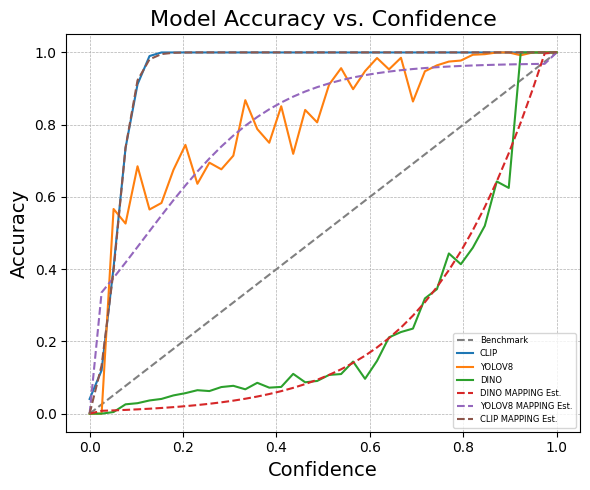

In [8]:

# Generating data
xx = np.linspace(0, 1, len(accuracy))

# Initializing the plot
fig, ax = plt.subplots(figsize=(6, 5))

# Plotting Benchmark line
sns.lineplot(x=xx, y=xx, label='Benchmark', linestyle='--', color='grey', ax=ax)

# Plotting accuracy for various models
sns.lineplot(x=xx, y=accuracy_dict["accuracy_clip"], ax=ax, label='CLIP', linestyle='-') # marker='o'
sns.lineplot(x=xx, y=accuracy_dict["accuracy_yolo"], ax=ax, label='YOLOV8', linestyle='-') # marker='s'
sns.lineplot(x=xx, y=accuracy_dict["accuracy_dino"], ax=ax, label='DINO', linestyle='-', ) # marker='^'

# Plotting the mapping function

# dino
dino_mapping_fun = sigmoid(np.array(xx), a=mapping_est_parm["accuracy_dino"][0], k=mapping_est_parm["accuracy_dino"][1], x0=mapping_est_parm["accuracy_dino"][2])
dino_mapping_fun[0] = 0.0
dino_mapping_fun[-1] = 1
sns.lineplot(x=xx, y=dino_mapping_fun, ax=ax, label='DINO MAPPING Est.', linestyle='--')

# yolo
yolo_mapping_fun = sigmoid(np.array(xx), a=mapping_est_parm["accuracy_yolo"][0], k=mapping_est_parm["accuracy_yolo"][1], x0=mapping_est_parm["accuracy_yolo"][2])
yolo_mapping_fun[0] = 0.0
yolo_mapping_fun[-1] = 1
sns.lineplot(x=xx, y=yolo_mapping_fun, ax=ax, label='YOLOV8 MAPPING Est.', linestyle='--')

# clip
clip_mapping_fun = sigmoid(np.array(xx), a=mapping_est_parm["accuracy_clip"][0], k=mapping_est_parm["accuracy_clip"][1], x0=mapping_est_parm["accuracy_clip"][2])
clip_mapping_fun[0] = 0.0
clip_mapping_fun[-1] = 1
sns.lineplot(x=xx, y=clip_mapping_fun, ax=ax, label='CLIP MAPPING Est.', linestyle='--')

# Setting labels, title, and grid
ax.set_xlabel('Confidence', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Model Accuracy vs. Confidence', fontsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(loc='lower right', fontsize=6)
plt.tight_layout()

# Displaying the plot
plt.show()


In [10]:
data = {"xx":xx,
        "yolo_mapping_fun": yolo_mapping_fun,
        "dino_mapping_fun": dino_mapping_fun,
        "clip_mapping_fun": clip_mapping_fun,
        "yolo_acc" : accuracy_dict["accuracy_yolo"],
        "dino_acc": accuracy_dict["accuracy_dino"],
        "clip_acc" : accuracy_dict["accuracy_clip"]
        }

from ns_vfs.common.utility import save_dict_to_pickle
# def save_dict_to_pickle(dict_obj: dict | object, path: str, file_name: str = "data.pkl"):
save_dict_to_pickle(dict_obj=data, path="/opt/Neuro-Symbolic-Video-Frame-Search", file_name="mapping_estimiation_plot_data.pkl")

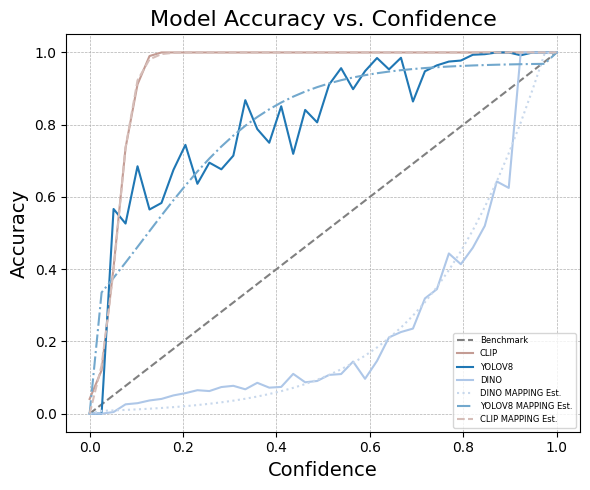

In [125]:
# Generating data
xx = np.linspace(0, 1, len(accuracy))

# Initializing the plot
fig, ax = plt.subplots(figsize=(6, 5))

# Plotting Benchmark line
sns.lineplot(x=xx, y=xx, label='Benchmark', linestyle='--', color='grey', ax=ax)

# Creating a color palette
palette = sns.color_palette("husl", 3)

# Plotting accuracy for various models with specified colors
sns.lineplot(x=xx, y=accuracy_dict["accuracy_clip"], ax=ax, label='CLIP', linestyle='-', color='#c49c94')
sns.lineplot(x=xx, y=accuracy_dict["accuracy_yolo"], ax=ax, label='YOLOV8', linestyle='-', color='#1f77b4')
sns.lineplot(x=xx, y=accuracy_dict["accuracy_dino"], ax=ax, label='DINO', linestyle='-', color='#aec7e8')
# Plotting the mapping function with associated but lighter colors
# Dino
dino_mapping_fun = sigmoid(np.array(xx), *mapping_est_parm["accuracy_dino"])
dino_mapping_fun[0] = 0.0
dino_mapping_fun[-1] = 1
sns.lineplot(x=xx, y=dino_mapping_fun, ax=ax, label='DINO MAPPING Est.', linestyle=':', color=sns.light_palette("#aec7e8")[3])

# Yolo
yolo_mapping_fun = sigmoid(np.array(xx), *mapping_est_parm["accuracy_yolo"])
yolo_mapping_fun[0] = 0.0
yolo_mapping_fun[-1] = 1
sns.lineplot(x=xx, y=yolo_mapping_fun, ax=ax, label='YOLOV8 MAPPING Est.', linestyle='-.', color=sns.light_palette("#1f77b4")[3])

# Clip
clip_mapping_fun = sigmoid(np.array(xx), *mapping_est_parm["accuracy_clip"])
clip_mapping_fun[0] = 0.0
clip_mapping_fun[-1] = 1
sns.lineplot(x=xx, y=clip_mapping_fun, ax=ax, label='CLIP MAPPING Est.', linestyle='--', color=sns.light_palette("#c49c94")[3])

# Setting labels, title, and grid
ax.set_xlabel('Confidence', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Model Accuracy vs. Confidence', fontsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend(loc='lower right', fontsize=6)
plt.tight_layout()

# Displaying the plot
plt.show()



In [126]:
mapping_est_parm

{'accuracy_clip': array([ 1.0001778 , 56.54636013,  0.05872907]),
 'accuracy_yolo': array([0.97086119, 7.02436167, 0.11652157]),
 'accuracy_dino': array([3.85555976, 5.41653941, 1.16873495])}

Text(0, 0.5, 'accuracy')

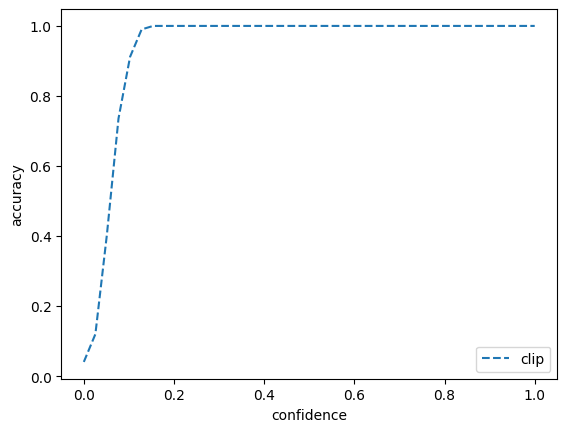

In [87]:
accuracy = accuracy_dict["accuracy_clip"]
# Convert the accuracy data to a Pandas Series
accuracy_series = pd.Series(accuracy)
# Compute the moving average of the accuracy data
window_size = 5  # Choose an appropriate window size
smoothed_accuracy = accuracy_series.rolling(window=window_size).mean()
smoothed_accuracy = accuracy[:window_size] + list(smoothed_accuracy[window_size:])

xx = np.linspace(0, 1, len(accuracy))
yy = sigmoid(np.array(xx), k=15, x0=0.66)
ax = sns.lineplot(x=xx, y=accuracy, label='clip', linestyle='dashed')

# sns.lineplot(x=xx, y=smoothed_accuracy, ax=ax, label='clip (smoothed)', linestyle='dashed')
ax.set_xlabel('confidence')
ax.set_ylabel('accuracy')
# plt.savefig(
#             ROOT_DIR / f"conf_score_imagenet_yolo_8n_3000_15_20231010_051516.png",
#             dpi=300,
#         )

In [21]:
clip_accuracy = accuracy

In [18]:
"""Getting confidence threshold"""
def get_confidence_true_threshold(conf_range, accuracy, target_acc):
    for i, acc in enumerate(accuracy):
        if acc > target_acc:
            return (conf_range[i], conf_range[i]+0.02)
    return None

def get_confidence_false_threshold(conf_range, accuracy, target_acc):
    for i, acc in enumerate(accuracy):
        if acc < target_acc:
            return (conf_range[i], conf_range[i]+0.02)
    return None
get_confidence_true_threshold(conf_range, accuracy, 0.80)

(0.28, 0.30000000000000004)

3000

**The line below is used for dev and now archived.**

In [ ]:
IMAGE_LOADER = ["coco"]
CONFIG = load_config()
NUM_SAMPLE = 1000
for img_loader in IMAGE_LOADER:
    conf_score = {}
    true_lable = {}
    if img_loader == "coco":
        dataloader = COCOImageLoader(
            coco_dir_path="/opt/Neuro-Symbolic-Video-Frame-Search/artifacts/data/benchmark_image_dataset/coco",
            annotation_file="annotations/instances_val2017.json",
            image_dir="val2017",
        )
    data = dataloader.data
    images = data.images
    labels = data.labels
    print(f"Dataset: {img_loader}...Sampling {NUM_SAMPLE} images...")
    print(f"Number of images: {len(images)}, Number of labels: {len(labels)}")

In [ ]:
from ns_vfs.model.vision.yolo import Yolo
from ns_vfs.model.vision.grounding_dino import GroundingDino
yolo = Yolo(
    config=CONFIG.YOLO,
    weight_path=CONFIG.YOLO.YOLO_CHECKPOINT_PATH,
)
dino = GroundingDino(
            config=CONFIG.GROUNDING_DINO,
            weight_path=CONFIG.GROUNDING_DINO.GROUNDING_DINO_CHECKPOINT_PATH,
            config_path=CONFIG.GROUNDING_DINO.GROUNDING_DINO_CONFIG_PATH,
        )

In [ ]:

cv_model = yolo
sample_lable_of_interest = LABEL_OF_INTEREST[:10]
for input_label in sample_lable_of_interest:
    conf_score[input_label] = []
    true_lable[input_label] = []
    for s in range(NUM_SAMPLE):
        # true lable of random image data
        conf = cv_model.get_confidence_score(frame_img=images[s], true_lable=input_label)
        conf_score[input_label].append(conf)
        if input_label in labels[s]:
            true_lable[input_label].append(True)
        else:
            true_lable[input_label].append(False)

In [ ]:
print(conf_score["person"])
print(true_lable["person"])

In [ ]:
sample_lable_of_interest = LABEL_OF_INTEREST

In [ ]:
import seaborn as sns
import pandas as pd
def sigmoid(x, k=1, x0=0):
  return 1 / (1 + np.exp(-k * (x-x0) ))
# Convert the accuracy data to a Pandas Series
accuracy_series = pd.Series(accuracy)
# Compute the moving average of the accuracy data
window_size = 5  # Choose an appropriate window size
smoothed_accuracy = accuracy_series.rolling(window=window_size).mean()
smoothed_accuracy = accuracy[:window_size] + list(smoothed_accuracy[window_size:])

xx = np.linspace(0, 1, len(accuracy))
yy = sigmoid(np.array(xx), k=50, x0=0.56)
# ax = sns.lineplot(x=xx, y=yy, label='Mapping Estimation')
ax = sns.lineplot(x=xx, y=accuracy, label='yolo', linestyle='dashed')
sns.lineplot(x=xx, y=smoothed_accuracy, ax=ax, label='yolo (smoothed)', linestyle='dashed')
ax.set_xlabel('confidence')
ax.set_ylabel('accuracy')

In [ ]:
# multiple files per label
from pathlib import Path
from _common import get_available_benchmark_video
from ns_vfs.common.utility import load_pickle_to_dict
dir_path = Path("/opt/Neuro-Symbolic-Video-Frame-Search/artifacts/exp_1_2_dir/dino")
all_data_list=get_available_benchmark_video(dir_path)
map_ = {}
for per_label_acc in all_data_list:
    idx = per_label_acc.name.split(".pkl")[0].split("_")[-1]
    map_[idx] = load_pickle_to_dict(per_label_acc)
    if per_label_acc.name.con
    acc_data = load_pickle_to_dict(per_label_acc)

In [ ]:
all_data_list[0].name.split(".pkl")[0].split("_")[-1]

In [ ]:
# Given list
my_list = ['pizza', 'U', 'sports_car']

# Concatenate the list elements into a string and remove spaces
result = ''.join(my_list).replace(' ', '')

# Print the resulting string
print(result)  # This will print "Gpizza"

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import random

In [ ]:

#from google.colab.patches import cv2_imshow

classes = ['plane', 'bird', 'car', 'cat', 'deer',
           'dog', 'horse', 'monkey', 'ship', 'truck']

test_dataset = tfds.load("stl10", split="test")
ds = test_dataset.as_numpy_iterator()
data, label = [], []
for d in ds:
    img, lab = d['image'], d['label']
    data.append(img)
    label.append(lab)

temp = list(zip(data, label))
random.shuffle(temp)
res1, res2 = zip(*temp)
data, label = list(res1), list(res2)

In [ ]:
from ns_vfs.model.vision.yolo import Yolo
from ns_vfs.model.vision.grounding_dino import GroundingDino
from ns_vfs.config.loader import load_config
CONFIG = load_config()
yolo = Yolo(
    config=CONFIG.YOLO,
    weight_path=CONFIG.YOLO.YOLO_CHECKPOINT_PATH,
)
dino = GroundingDino(
            config=CONFIG.GROUNDING_DINO,
            weight_path=CONFIG.GROUNDING_DINO.GROUNDING_DINO_CHECKPOINT_PATH,
            config_path=CONFIG.GROUNDING_DINO.GROUNDING_DINO_CONFIG_PATH,
        )

In [ ]:
len(data)


In [ ]:
import pandas as pd
df = pd.DataFrame()
df['label'] = label[:3000]
df.head(10)

In [ ]:
classes

In [ ]:
import pickle

my_list = [1, 2, 3, 4, 5]

with open('./tfds_label.pkl', 'wb') as f:
    pickle.dump(label, f)

In [ ]:
for c in range(10):
    print(c)
    scores = []
    for i in range(3000):
        if i % 500 == 0:
            print(i)
        conf = dino.get_confidence_score(data[i], classes[c])
        scores.append(conf)
    df[classes[c]] = scores
df.head(10)

In [ ]:
df.to_csv(cwd + 'conf_3.csv', index=False)

In [ ]:
import pickle
data_path = "/opt/Neuro-Symbolic-Video-Frame-Search/store/nsvs_artifact/experiment_1.2_calibration/tfds_dataset.pkl"
label_path = "/opt/Neuro-Symbolic-Video-Frame-Search/store/nsvs_artifact/experiment_1.2_calibration/tfds_label.pkl"

with open(label_path, 'rb') as f:
    label = pickle.load(f)

with open(data_path, 'rb') as f:
    data = pickle.load(f)


In [ ]:
data[0].shape

In [1]:
import pandas as pd
classes = ['plane', 'bird', 'car', 'cat', 'deer',
           'dog', 'horse', 'monkey', 'ship', 'truck']

df = pd.read_csv("/opt/Neuro-Symbolic-Video-Frame-Search/store/nsvs_artifact/experiment_1.2_calibration/tsdf_conf.csv")
df.head()

,label,person,bicycle,car,airplane,truck,cat,dog,horse,laptop,apple,banana,cup,chair,clock,spoon
0,2,0.464006,0.433709,0.513990,0.398735,0.357958,0.388291,0.434529,0.456302,0.316989,0.597388,0.434262,0.428253,0.502902,0.388680,0.369125
1,0,0.482275,0.543361,0.500466,0.626277,0.524244,0.628157,0.553228,0.637798,0.489605,0.486724,0.578164,0.501865,0.459173,0.502832,0.598432
2,9,0.340578,0.558840,0.603078,0.677048,0.659077,0.601512,0.533118,0.598411,0.524025,0.543483,0.581778,0.398734,0.448127,0.633626,0.505312
3,0,0.449016,0.534425,0.525351,0.662265,0.514209,0.639552,0.528659,0.662503,0.427763,0.419066,0.651782,0.367000,0.400405,0.498935,0.554534
4,9,0.372448,0.444765,0.627246,0.623718,0.694312,0.494038,0.411502,0.464275,0.389204,0.536423,0.527802,0.533666,0.445997,0.527319,0.460454


In [ ]:
arr = df.to_numpy()
labels, scores = arr[:, 0], arr[:, 1:]
labels.shape, scores.shape

In [ ]:
x = np.array(range(30))/50 + 0.2
x

In [ ]:
scores[0]

In [ ]:
def sigmoid(x, k=1, x0=0):
  return 1 / (1 + np.exp(-k * (x-x0) ))

def acc_range(sco, lab, low, high, labs):
    correct = 0
    total = 0
    for s in range(len(sco)):
        for i in range(10):
            if sco[s, i] >= low and sco[s, i] < high and lab[s] in labs:
                total += 1
                if i==lab[s]:
                    correct += 1
    if total == 0:
        return 1 if high > 0.5 else 0
    return correct/total

k_num = 600

accs = []
for k in range(5):
    for low in x:
        accs.append(acc_range(scores[k*k_num:k*k_num+k_num], labels[k*k_num:k*k_num+k_num], low, low+0.02, [1,3,5,7,9]))

In [ ]:
import seaborn as sns
def sigmoid(x, k=1, x0=0):
  return 1 / (1 + np.exp(-k * (x-x0) ))

xx = np.linspace(0, 1, len(accs))
yy = sigmoid(np.array(xx), k=50, x0=0.56)

ax = sns.lineplot(x=xx, y=accs, label='Gounded-SAM')
sns.lineplot(x=xx, y=xx, ax=ax, label='Benchmark', linestyle='dashed')
sns.lineplot(x=xx, y=yy, ax=ax, label='Mapping Estimation', linestyle='dotted')
ax.set_xlabel('confidence')
ax.set_ylabel('accuracy')

# tikzplotlib.save(cwd+"plots/conf_to_acc.tex")

In [ ]:
[i for i in accs if i > 0.1]

In [ ]:
scores[0]

In [ ]:
[i for i in scores[0] if i > 0.5]

In [ ]:
import os

GROUNDING_DINO_CONFIG_PATH = "/opt/Neuro-Symbolic-Video-Frame-Search/ns_vfs/config/GroundingDINO_SwinT_OGC.py"
print(GROUNDING_DINO_CONFIG_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CONFIG_PATH))

import os

GROUNDING_DINO_CHECKPOINT_PATH = "/opt/Neuro-Symbolic-Video-Frame-Search/store/nsvs_artifact/weights/groundingdino_swint_ogc.pth"
print(GROUNDING_DINO_CHECKPOINT_PATH, "; exist:", os.path.isfile(GROUNDING_DINO_CHECKPOINT_PATH))
import torch

from groundingdino.util.inference import Model

grounding_dino_model = Model(model_config_path=GROUNDING_DINO_CONFIG_PATH, model_checkpoint_path=GROUNDING_DINO_CHECKPOINT_PATH)

In [10]:
for i in conf_score["person"]:
    if i > .80:
        print(i)

0.87048
0.87320065
0.88567466
0.808932
0.8054261
0.81315655
0.81444347
0.8396846
0.9023266
0.87320065
0.82158595
0.8339016
0.81461746
0.8018347
0.80645984
0.8004343
0.90756637
0.81764746
0.808932
0.90519005
0.8331893
0.84559
0.8309105
0.85385925
0.89381427
0.8149153
0.82114315
0.8162341
0.8537526
0.82357055
0.8202105
0.83545655
0.8149153
0.8470992
0.82114315
0.8100267
0.8537526
0.81764746
0.8098273
0.8830042
0.84668434
0.8171821
0.85177666
0.81851226
0.81717527
0.8858635
0.90756637
0.8202105
0.81851226
0.82841665
0.81717527
0.81444347
0.8161716
0.81764746
0.81717527
0.88011986
0.81461746
0.81764746
0.81315655
0.81851226
0.8216563
0.81461746
0.8018347
0.83985484
0.84916884
0.82446223
0.8612941
0.8461671
0.80216575
0.8351198
0.8213263
0.80645984
0.8396846
0.8544235
0.88011986
0.89381427
0.8396846
0.82446223
0.84559
0.82198447
0.8396846
0.83985484
0.80463475
